# Lab_4

## Convolutional Neural Network 

In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [2]:
train = "Cats_and_Dogs/train/"
val = "Cats_and_Dogs/val/"
test = "Cats_and_Dogs/test/"

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

batch_size = 64
nb_train_samples = 15000
nb_validation_samples = 2400
nb_test_samples = 2500

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [3]:
datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = datagen.flow_from_directory(
  train,
  target_size = (img_width, img_height),
  batch_size = batch_size,
  class_mode = "binary"
)

val_generator = datagen.flow_from_directory(
  val,
  target_size = (img_width, img_height),
  batch_size = batch_size,
  class_mode = "binary"
)

test_generator = datagen.flow_from_directory(
  test,
  target_size = (img_width, img_height),
  batch_size = batch_size,
  class_mode = "binary"
)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [4]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D((2,2), strides = 2))

# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation("relu"))
# 4:  +Pooling 

model.add(MaxPooling2D((2,2), strides = 2))

# 5:  +Convolutional
model.add(Conv2D(64,(3,3)))
#     +Relu
model.add(Activation("relu"))
# 6:  +Pooling 
model.add(MaxPooling2D((2,2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(128))
#     +ReLu
model.add(Activation("relu"))
# 9:  +Dropout
model.add(Dropout(0.15))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation("sigmoid"))

In [5]:
model.compile(
  loss = "binary_crossentropy",
  optimizer = "adam",
  metrics = ["accuracy"]
)

In [6]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

his = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs = 15 , # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
234/234 [==============================] - 166s 708ms/step - loss: 0.5877 - accuracy: 0.6827 - val_loss: 0.5085 - val_accuracy: 0.7449
Epoch 2/15
234/234 [==============================] - 162s 691ms/step - loss: 0.4812 - accuracy: 0.7708 - val_loss: 0.4419 - val_accuracy: 0.7990
Epoch 3/15
234/234 [==============================] - 169s 721ms/step - loss: 0.4225 - accuracy: 0.8067 - val_loss: 0.4636 - val_accuracy: 0.7783
Epoch 4/15
234/234 [==============================] - 160s 686ms/step - loss: 0.3688 - accuracy: 0.8359 - val_loss: 0.4097 - val_accuracy: 0.8049
Epoch 5/15
234/234 [==============================] - 159s 678ms/step - loss: 0.3234 - accuracy: 0.8613 - val_loss: 0.3851 - val_accuracy: 0.8277
Epoch 6/15
234/234 [==============================] - 151s 643ms/step - loss: 0.2660 - accuracy: 0.8862 - val_loss: 0.4059 - val_accuracy: 0.8197
Epoch 7/15
234/234 [============================

In [7]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Accuracy on test data: 83.65%


Plot the graphs: 

- Loss(Number of epochs)

- Accuracy(Number of epochs)

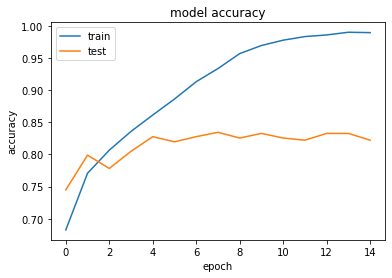

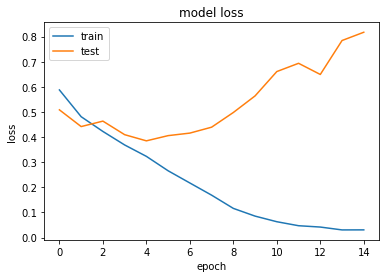

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()
#summarize history for loss
plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

Let's try to improve the quality of recognition, using the method of transfer lerning. 

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [9]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [10]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))
# + ReLu
model.add(Activation("relu"))
# + Dropout
model.add(Dropout(0.15))
# + Dense layer with 1 neuron
model.add(Dense(1))
# + sigmoid
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_6 (Activation)    (None, 1)                

In [11]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [12]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

his = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
234/234 [==============================] - 981s 4s/step - loss: 0.4762 - accuracy: 0.7744 - val_loss: 0.3377 - val_accuracy: 0.8716
Epoch 2/10
234/234 [==============================] - 697s 3s/step - loss: 0.3182 - accuracy: 0.8677 - val_loss: 0.2843 - val_accuracy: 0.8830
Epoch 3/10
234/234 [==============================] - 715s 3s/step - loss: 0.2773 - accuracy: 0.8833 - val_loss: 0.2549 - val_accuracy: 0.8995
Epoch 4/10
234/234 [==============================] - 693s 3s/step - loss: 0.2543 - accuracy: 0.8942 - val_loss: 0.2427 - val_accuracy: 0.9050
Epoch 5/10
234/234 [==============================] - 723s 3s/step - loss: 0.2412 - accuracy: 0.9000 - val_loss: 0.2345 - val_accuracy: 0.9088
Epoch 6/10
234/234 [==============================] - 680s 3s/step - loss: 0.2276 - accuracy: 0.9056 - val_loss: 0.2277 - val_accuracy: 0.9130
Epoch 7/10
234/234 [==============================] - 676s 3s/step - loss: 0.2172 - accuracy: 0.9103 - val_loss: 0.2288 - val_accuracy: 0.9117

In [13]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 90.02%


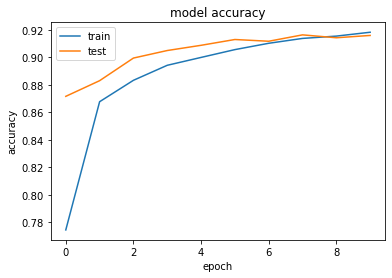

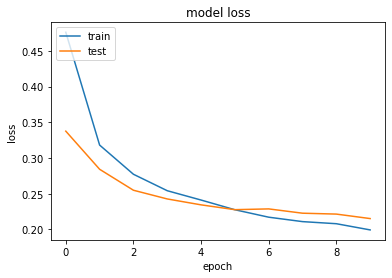

In [14]:
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()
#summarize history for loss
plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

In [15]:
# Download the weights of the VGG19 network trained on the ImageNet dataset:
from keras.applications import VGG19

vgg19_net = VGG19(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg19_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg19_net.summary()                       # pay attention to the number of trained and untrained parameters

80142336/80134624 [==============================] - 32s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_____________________________________________________________

In [16]:
# add layers to VGG19:

model = Sequential()
model.add(vgg19_net)

# + flattening
model.add (Flatten ())
# + Dense fullyconnected layer with 256 neurons
# + ReLu
model.add(Dense(256, activation='relu'))
# + Dropout
model.add(Dropout (0.5)) 
# + Dense layer with 1 neuron
# + sigmoid
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 2,097,665
Non-trainable params: 20,024,384
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-5), 
              metrics=['accuracy'])

In [18]:
his = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
234/234 [==============================] - 891s 4s/step - loss: 0.5606 - accuracy: 0.7040 - val_loss: 0.4158 - val_accuracy: 0.8252
Epoch 2/10
234/234 [==============================] - 866s 4s/step - loss: 0.4029 - accuracy: 0.8247 - val_loss: 0.3532 - val_accuracy: 0.8547
Epoch 3/10
234/234 [==============================] - 857s 4s/step - loss: 0.3543 - accuracy: 0.8446 - val_loss: 0.3310 - val_accuracy: 0.8590
Epoch 4/10
234/234 [==============================] - 850s 4s/step - loss: 0.3289 - accuracy: 0.8598 - val_loss: 0.3111 - val_accuracy: 0.8725
Epoch 5/10
234/234 [==============================] - 851s 4s/step - loss: 0.3071 - accuracy: 0.8700 - val_loss: 0.2993 - val_accuracy: 0.8796
Epoch 6/10
234/234 [==============================] - 850s 4s/step - loss: 0.2944 - accuracy: 0.8731 - val_loss: 0.2883 - val_accuracy: 0.8830
Epoch 7/10
234/234 [==============================] - 852s 4s/step - loss: 0.2847 - accuracy: 0.8815 - val_loss: 0.2832 - val_accuracy: 0.8860

In [19]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 87.70%


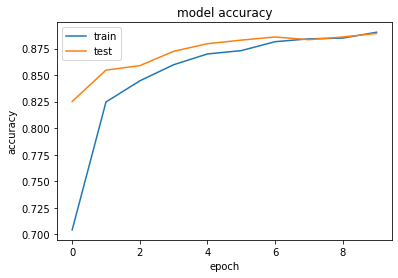

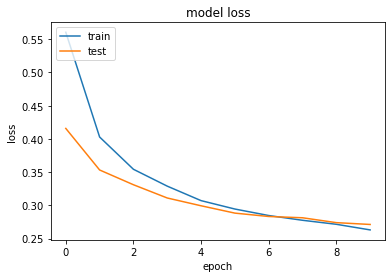

In [20]:
plt.plot(his.history["accuracy"])
plt.plot(his.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()
#summarize history for loss
plt.plot(his.history["loss"])
plt.plot(his.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc = "upper left")
plt.show()

In [21]:
import cv2
import numpy as np
def load_n_show(model, image_path: str, show_image = True)->bool:
    # 1-dog, 0-cat
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if show_image:
        img = cv2.resize(img, dsize=(150,150), interpolation=cv2.INTER_CUBIC)
        plt.figure(figsize = (10,20))
        plt.imshow(img)
        plt.show()
    img = img / 255
    img = np.expand_dims(img, axis=0)
    res = model.predict_classes([img])[0][0]
    print(f"I bet it is {'dog' if res == 1 else 'cat'}")
    return res

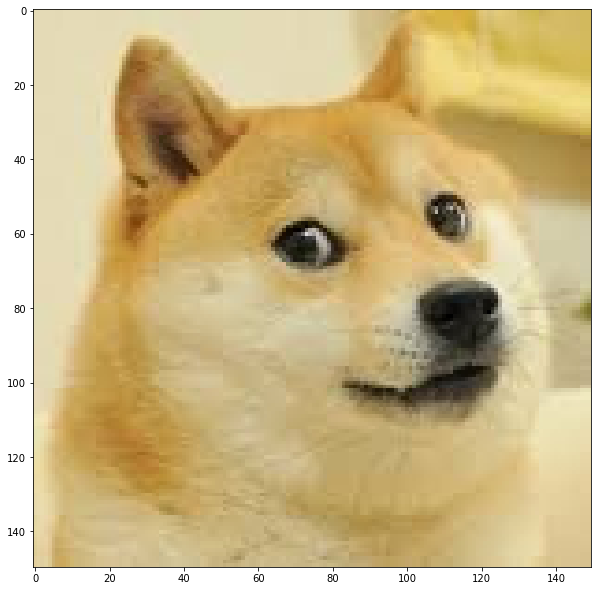

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I bet it is dog


1

In [22]:
load_n_show(model, "dog.jpg")

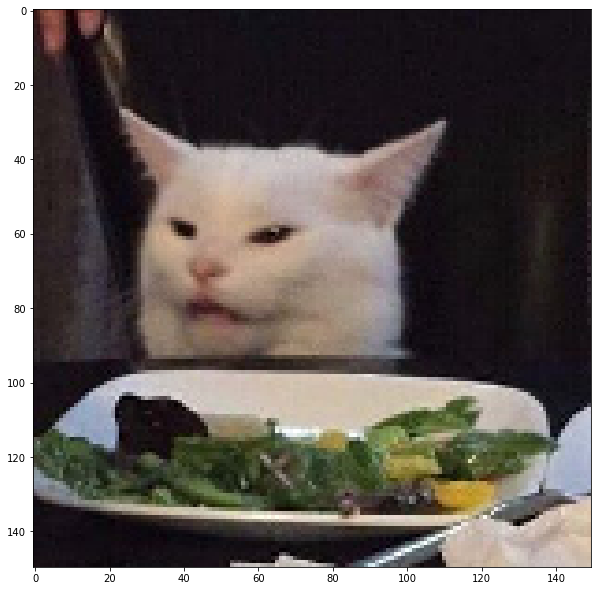

I bet it is cat


0

In [23]:
load_n_show(model, "cat.jpg")